# Tensors, layers, and autoencoders


## It's a flow of tensors
If you have already built a model, you can use the model.layers and the keras.backend to build functions that, provided with a valid input tensor, return the corresponding output tensor.

This is a useful tool when trying to understand what is going on inside the layers of a neural network.

For instance, if you get the input and output from the first layer of a network, you can build an inp_to_out function that returns the result of carrying out forward propagation through only the first layer for a given input tensor.

So that's what you're going to do right now!

X_test from the Banknote Authentication dataset and its model are preloaded. Type model.summary() in the console to check it.

### init

In [1]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(X_test)
"""

tobedownloaded="""
{numpy.ndarray: {'X_test.csv': 'https://file.io/GdBFuo'}}
"""
prefix='data_from_datacamp/Chap4-Exercise1.1_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

from uploadfromdatacamp import loadNDArrayFromCsv
X_test = loadNDArrayFromCsv(prefix+'X_test.csv')



{numpy.ndarray: {"X_test.csv": "https://file.io/GdBFuo"}}

{'numpy.ndarray': {'X_test.csv': 'https://file.io/GdBFuo'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 32243    0 32243    0     0  36556      0 --:--:-- --:--:-- --:--:-- 36556


In [3]:
# Import the Sequential model and Dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 10 neurons
model.add(Dense(2, input_shape=(4,), activation="relu"))

# Add a 1-neuron output layer
model.add(Dense(1))

# Summarise your model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


### code

In [4]:
# Import keras backend
import keras.backend as K

# Input tensor from the 1st layer of the model
inp = model.layers[0].input

# Output tensor from the 1st layer of the model
out = model.layers[0].output

# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])

# Print the results of passing X_test through the 1st layer
print(inp_to_out([X_test]))







[array([[-0.        ,  1.1413565 ],
       [ 0.50160754, -0.        ],
       [-0.        ,  1.0878862 ],
       [-0.        ,  0.8983091 ],
       [ 0.04065445, -0.        ],
       [ 0.6094086 , -0.        ],
       [ 0.08919714,  0.0574941 ],
       [ 0.71646565, -0.        ],
       [ 0.05894362,  0.68509585],
       [-0.        ,  0.58478713],
       [ 0.0820136 ,  0.12475383],
       [ 0.04357683,  0.42262885],
       [-0.        ,  0.4156704 ],
       [-0.        ,  0.81416404],
       [ 0.27348474,  0.88723946],
       [-0.        ,  0.00630143],
       [-0.        ,  1.0805495 ],
       [ 0.11819905,  0.06668571],
       [ 0.4102956 , -0.        ],
       [ 0.72914624, -0.        ],
       [-0.        ,  0.765294  ],
       [ 0.09746257, -0.        ],
       [ 0.33014125, -0.        ],
       [ 0.10004649, -0.        ],
       [ 0.03631295,  0.03481184],
       [-0.        ,  0.4138997 ],
       [ 0.02975849,  0.43973845],
       [-0.        ,  0.31238568],
       [ 0.09

## Neural separation
Neurons learn by updating their weights to output values that help them distinguish between the input classes. So put on your gloves because you're going to perform brain surgery!

You will make use of the inp_to_out() function you just built to visualize the output of two neurons in the first layer of the Banknote Authentication model as epochs go by. Plotting the outputs of both of these neurons against each other will show you the difference in output depending on whether each bill was real or fake.

The model you built in chapter 2 is ready for you to use, just like X_test and y_test. Copy print(inspect.getsource(plot)) in the console if you want to check plot().

You're performing heavy duty, once it's done, take a look at the graphs to watch the separation live!

### init

In [5]:
#print(inspect.getsource(plot))
import matplotlib.pyplot as plt
def plot():
  fig, ax = plt.subplots()
  plt.scatter(layer_output[:, 0], layer_output[:, 1],c=y_test,edgecolors='none')
  plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i+1, test_accuracy * 100.0))
  plt.show()
    

In [11]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(X_train, y_train, y_test, X_test)
"""

tobedownloaded="""
{numpy.ndarray: {'X_test.csv': 'https://file.io/N8tcpv',
  'X_train.csv': 'https://file.io/xastru',
  'y_test.csv': 'https://file.io/zJehFm',
  'y_train.csv': 'https://file.io/TocYUT'}}
"""
prefix='data_from_datacamp/Chap4-Exercise1.2_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

from uploadfromdatacamp import loadNDArrayFromCsv
X_train = loadNDArrayFromCsv(prefix+'X_train.csv')
y_train = loadNDArrayFromCsv(prefix+'y_train.csv')
X_test = loadNDArrayFromCsv(prefix+'X_test.csv')
y_test = loadNDArrayFromCsv(prefix+'y_test.csv')


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


### code

275/275 [==============================] - 0s 260us/step


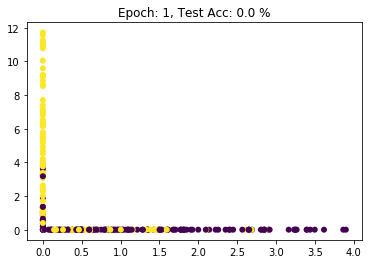

275/275 [==============================] - 0s 17us/step


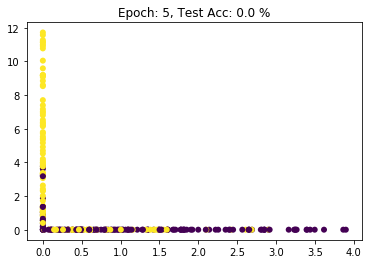

275/275 [==============================] - 0s 28us/step


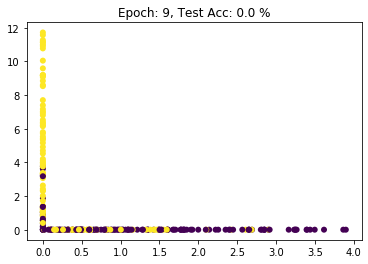

275/275 [==============================] - 0s 22us/step


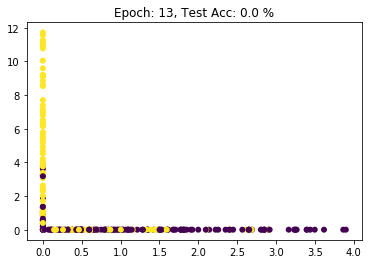

275/275 [==============================] - 0s 29us/step


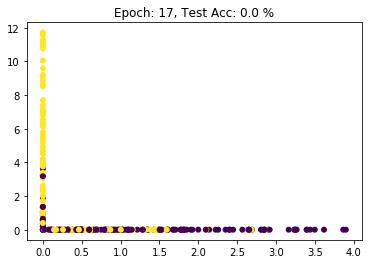

275/275 [==============================] - 0s 15us/step


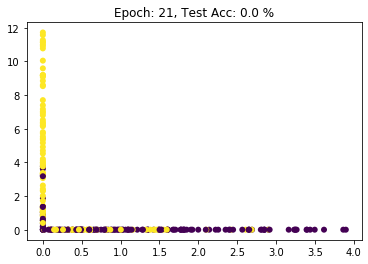

In [12]:
for i in range(0, 21):
    # Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size=16, epochs=1,verbose=0)
    if i%4==0: 
      # Get the output of the first layer
      layer_output = inp_to_out([X_test])[0]
      
      # Evaluate model accuracy for this epoch
      test_accuracy = model.evaluate(X_test, y_test)[1] 
      
      # Plot 1st vs 2nd neuron output
      plot()

## Building an autoencoder
Autoencoders have several interesting applications like anomaly detection or image denoising. They aim at producing an output identical to its inputs. The input will be compressed into a lower dimensional space, encoded. The model then learns to decode it back to its original form.

You will encode and decode the MNIST dataset of handwritten digits, the hidden layer will encode a 32-dimensional representation of the image, which originally consists of 784 pixels.

The Sequential model and Dense layers are ready for you to use.

Let's build an autoencoder!

### code

In [14]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with the original image as input
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many nodes as the image
autoencoder.add(Dense(784, activation="sigmoid"))

# Compile your model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Take a look at your model structure
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## De-noising like an autoencoder
Okay, you have just built an autoencoder model. Let's see how it handles a more challenging task.

First, you will build a model that encodes images, and you will check how different digits are represented with show_encodings(). You can change the number parameter of this function to check other digits in the console.

Then, you will apply your autoencoder to noisy images from MNIST, it should be able to clean the noisy artifacts.

X_test_noise is loaded in your workspace. The digits in this data look like this:



Apply the power of the autoencoder!

### init

In [28]:
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
import inspect
print_func(show_encodings)
"""
import matplotlib.pyplot as plt
def show_encodings(encoded_imgs,number=4):
    n = 5  # how many digits we will display
    original = X_test_noise
    original = original[np.where(y_test == number)]
    encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')
    plt.show()


In [19]:
#upload and download

from uploadfromdatacamp import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(X_test_noise)
"""

tobedownloaded="""
{numpy.ndarray: {'X_test_noise.csv': 'https://file.io/LEbYEg'}}
"""
prefix='data_from_datacamp/Chap4-Exercise1.4_'
#saveFromFileIO(tobedownloaded, prefix=prefix, proxy="10.225.92.1:80")

#initialisation

from uploadfromdatacamp import loadNDArrayFromCsv
X_test_noise = loadNDArrayFromCsv(prefix+'X_test_noise.csv')

In [30]:
autoencoder.fit(X_train, y_train, validation_date=(X_test, y_test), epochs=10, verbose=0 )

TypeError: Unrecognized keyword arguments: {'validation_date': (array([[-1.4022233 , -0.00457705, -0.28110448, -0.5948078 ],
       [ 0.30884913,  0.44722828,  0.20793347,  0.6747141 ],
       [-1.5663137 , -1.7444715 ,  2.5663636 , -0.11705454],
       ...,
       [ 0.3683904 ,  0.97416687, -0.9713977 ,  0.07501808],
       [ 0.2766152 ,  0.02997267, -1.0660486 ,  0.6285386 ],
       [ 0.48479852,  0.968883  , -0.5515724 , -0.60713965]],
      dtype=float32), array([1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0.], dtype=float32))}

### code

<IPython.core.display.Javascript object>


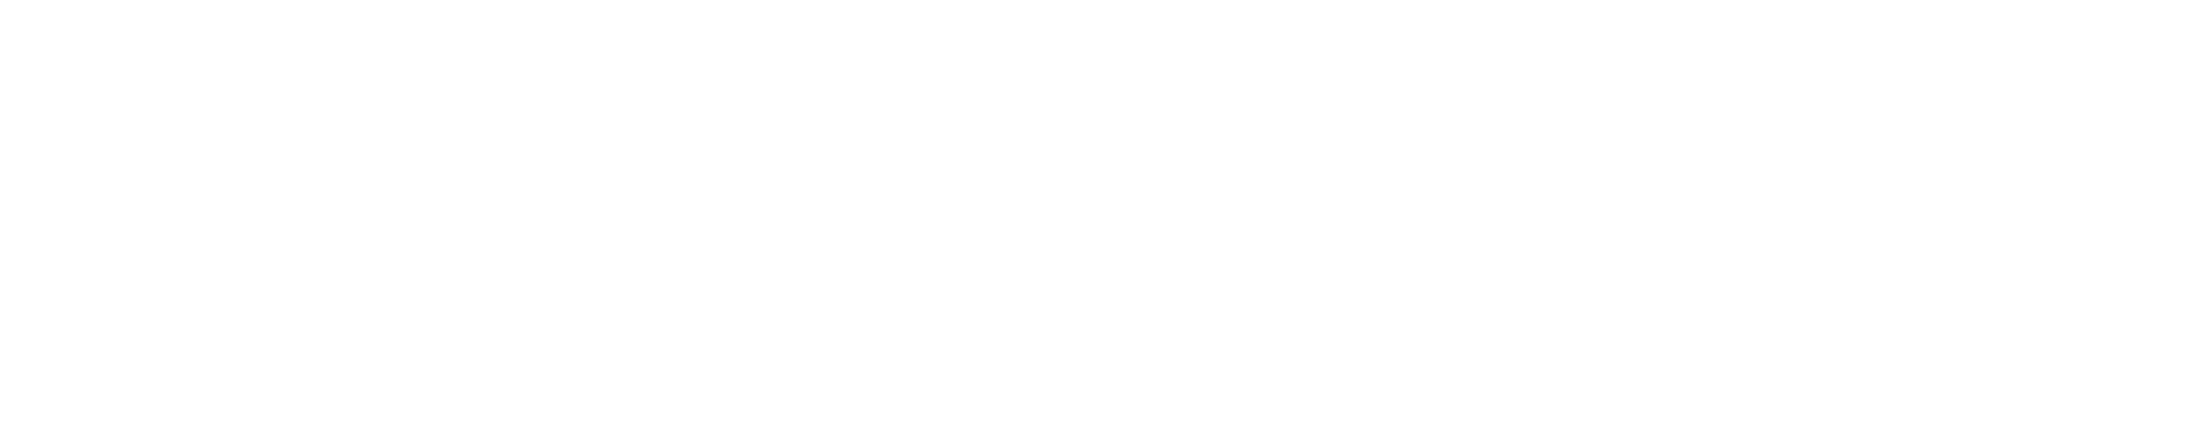

In [25]:
# Build your encoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the images and show the encodings
preds = encoder.predict(X_test_noise)
show_encodings(preds)

<IPython.core.display.Javascript object>


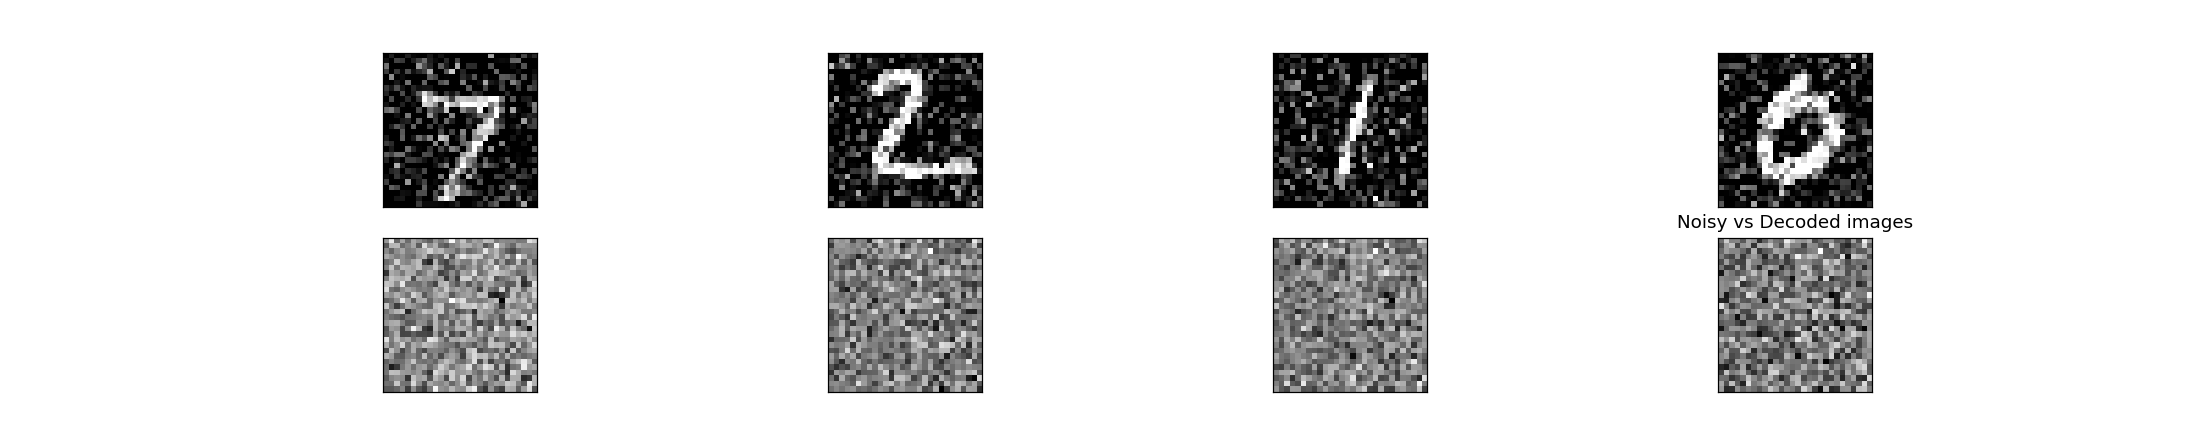

In [29]:
# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

## Intro to CNNs

## Building a CNN model
Building a CNN model in Keras isn't much more difficult than building any of the models you've already built throughout the course! You just need to make use of convolutional layers.

You're going to build a shallow convolutional model that classifies the MNIST dataset of digits. The same one you de-noised with your autoencoder!. The images are 28x28 pixels and just have one channel.

Go ahead and build this small convolutional model!

### code

In [31]:
# Import the Conv2D and Flatten layers and instantiate model
from keras.layers import Conv2D,Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, input_shape=(28, 28, 1), kernel_size=3, activation='relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size=3, activation='relu'))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation='softmax'))

## Looking at convolutions
Inspecting the activations of a convolutional layer is a cool thing. You have to do it at least once in your lifetime!

To do so, you will build a new model with the Keras Model object, which takes in a list of inputs and a list of outputs. The output you will provide to this new model is the first convolutional layer outputs when given an MNIST digit as input image.

The convolutional model you built in the previous exercise has already been trained for you. You can check it with model.summary() in the console.

Let's look at a couple convolutional masks that were learned in the first convolutional layer of this model!